In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pycoingecko
import datetime

# Data Preparing

## 1. Process JSON Data

In [2]:
def read_file(file_path):
    with open(file_path, "r") as file:
      return json.loads(file.read())

In [3]:
def save_file(data, path):
    """
    Save the data locally
    """
    data.to_csv(path, sep=',', encoding='utf-8', index=False, header=True)

In [4]:
def timestamp_to_date(timestamp):
    return datetime.datetime.fromtimestamp(timestamp).date()

In [5]:
def process_json(file_path):
    """
     Load a json file and process it to a dataframe
    """
    # Load the JSON file
    json_data = read_file(file_path)
    
    # Create dataframe with 'open', close', high', low', volume' and 'timestamp'  values
    json_data_quote = pd.json_normalize(json_data, record_path=["chart", "result", "indicators", "quote"], 
                                  meta=[
                                      ["chart", "result"[0], "timestamp"]
                                  ])
    
    json_data_quote_exploded = json_data_quote.explode(["close", "open", "high", "low", "volume", "chart.r.timestamp"])
    
    # Create dataframe with 'adjclose'  and 'timestamp' values
    json_data_adjclose = pd.json_normalize(json_data, record_path=["chart", "result", "indicators", "adjclose"], 
                                  meta=[
                                      ["chart", "result"[0], "timestamp"]
                                  ])

    json_data_adjclose_exploded = json_data_adjclose.explode(["chart.r.timestamp", "adjclose"])
    
    # Merge the two dataframes on the 'timestamp' after exploding of the columns
    json_data_merged = json_data_quote_exploded.merge(json_data_adjclose_exploded, on = "chart.r.timestamp")
    
    # Rename the columns
    json_data_merged.rename(
        columns={"close": "Close", "open": "Open", "high": "High", "low": "Low", "volume": "Volume", "chart.r.timestamp": "Date", "adjclose": "Adj Close"},
                                         inplace = True)
    
    # Reorder columns
    json_data_merged = json_data_merged[
        ["Date", "Open",  "High", "Low", "Close", "Adj Close", "Volume"]
    ]
    
    # Convert timestamp to date
    json_data_merged.Date = json_data_merged.Date.apply(timestamp_to_date)

    return json_data_merged


In [6]:
def plot_market_data(dates, prices, title):
    plt.plot(dates, prices)
    
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    
    plt.title(title)
    plt.show()

### 1.1. Convert S&P_500 JSON-File to CSV-File

In [7]:
# Process S&P_500 JSON File
input_file_path = "data/S_and_P_500-5-Years.json"
output_path = "data/S_and_P_500-5-Years.csv"

sp_500_json_data = process_json(input_file_path)
sp_500_json_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-26,2866.699951,2879.27002,2856.0,2878.379883,2878.379883,2859790000
1,2019-08-27,2893.139893,2898.790039,2860.590088,2869.159912,2869.159912,3537490000
2,2019-08-28,2861.280029,2890.030029,2853.050049,2887.939941,2887.939941,3102480000
3,2019-08-29,2910.370117,2930.5,2905.669922,2924.580078,2924.580078,3177150000
4,2019-08-30,2937.090088,2940.429932,2913.320068,2926.459961,2926.459961,3009910000
...,...,...,...,...,...,...,...
1253,2024-08-19,5557.22998,5608.299805,5550.740234,5608.25,5608.25,3222050000
1254,2024-08-20,5602.879883,5620.509766,5585.5,5597.120117,5597.120117,2994420000
1255,2024-08-21,5603.089844,5632.680176,5591.569824,5620.850098,5620.850098,3119670000
1256,2024-08-22,5637.77002,5643.220215,5560.950195,5570.640137,5570.640137,2981530000


In [14]:
sp_500_json_data.Date

0       2019-08-26
1       2019-08-27
2       2019-08-28
3       2019-08-29
4       2019-08-30
           ...    
1253    2024-08-19
1254    2024-08-20
1255    2024-08-21
1256    2024-08-22
1257    2024-08-23
Name: Date, Length: 1258, dtype: object

In [15]:
sp_500_json_data.Close

0       2878.379883
1       2869.159912
2       2887.939941
3       2924.580078
4       2926.459961
           ...     
1253        5608.25
1254    5597.120117
1255    5620.850098
1256    5570.640137
1257    5634.609863
Name: Close, Length: 1258, dtype: object

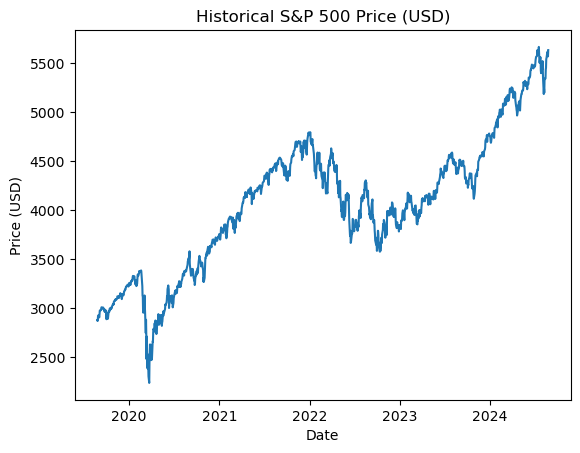

In [8]:
# Plot the data
dates = sp_500_json_data.Date
prices = sp_500_json_data.Close
title = 'Historical S&P 500 Price (USD)'
plot_market_data(dates, prices, title)

In [9]:
# Save the created Dataframe as CSV file
# save_file(sp_500_json_data, output_path)

### 1.2. Convert Gold JSON-File to CSV-File

In [10]:
# Process Gold JSON File
input_file_path = "data/gold_prices.json"
output_path = "data/Gold-USD-5-Years.csv"

gold_json_data = process_json(input_file_path)
gold_json_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-26,1543.199951,1543.300049,1524.300049,1526.300049,1526.300049,334
1,2019-08-27,1530.5,1542.099976,1528.5,1541.0,1541.0,166
2,2019-08-28,1538.099976,1538.099976,1537.800049,1537.800049,1537.800049,2756
3,2019-08-29,1537.5,1549.300049,1519.599976,1526.5,1526.5,704
4,2019-08-30,1524.599976,1530.400024,1516.699951,1519.099976,1519.099976,276
...,...,...,...,...,...,...,...
1254,2024-08-19,2508.5,2508.5,2487.199951,2501.800049,2501.800049,88
1255,2024-08-20,2503.5,2527.300049,2500.699951,2511.300049,2511.300049,187
1256,2024-08-21,2511.0,2515.399902,2503.899902,2508.399902,2508.399902,96
1257,2024-08-22,2504.100098,2504.100098,2471.100098,2478.899902,2478.899902,210


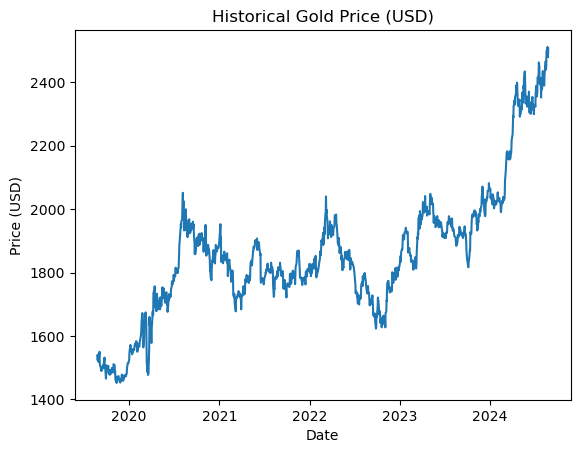

In [11]:
# Plot the data
dates = gold_json_data.Date
prices = gold_json_data.Close
title = 'Historical Gold Price (USD)'
plot_market_data(dates, prices, title)

In [12]:
# Save the created Dataframe as CSV file
# save_file(gold_json_data, output_path)

## 2. Download Bitcoin Data

Download the historical price data for Bitcoin from the CoinGecko API. We can only download the data for the last 365 days with the free account.

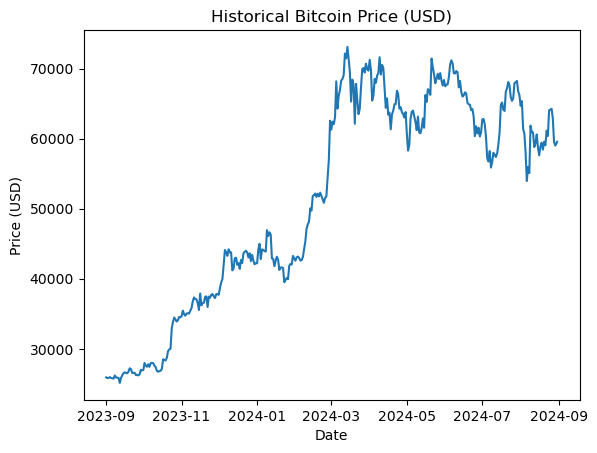

In [13]:
# Initialize CoinGecko API client
coinGecko = pycoingecko.CoinGeckoAPI()
# Get historical price data for Bitcoin for the last 365 days
btc_data = coinGecko.get_coin_market_chart_by_id('bitcoin', 'usd', '365days')
# Extract the dates and prices from the data
dates = [data[0] for data in btc_data['prices']]
# convert unix timestamp to datetime
dates = [
    datetime.datetime.fromtimestamp(date/1000)
    for date in dates
]
prices = [data[1] for data in btc_data['prices']]
# Plot the data
plt.plot(dates, prices)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Historical Bitcoin Price (USD)')
plt.show()